In [1]:
import pandas as pd
import numpy as np

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 온라인거래와 관련된 정보
online = pd.read_csv('Onlinesales_info.csv')
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [3]:
cus = pd.read_csv('Customer_info.csv')
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [4]:
dis = pd.read_csv('Discount_info.csv')
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [5]:
mark = pd.read_csv('Marketing_info.csv')
mark

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [6]:
tax = pd.read_csv('Tax_info.csv')
tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


## 제공된 이커머스 데이터를 활용하여 고객들을 효과적으로 세분화하고, 
## 그들의 행동 패턴과 구매 경향을 이해함으로써 기업이 더 나은 서비스를 제공할 수 있는 방안을 제시해야 합니다.


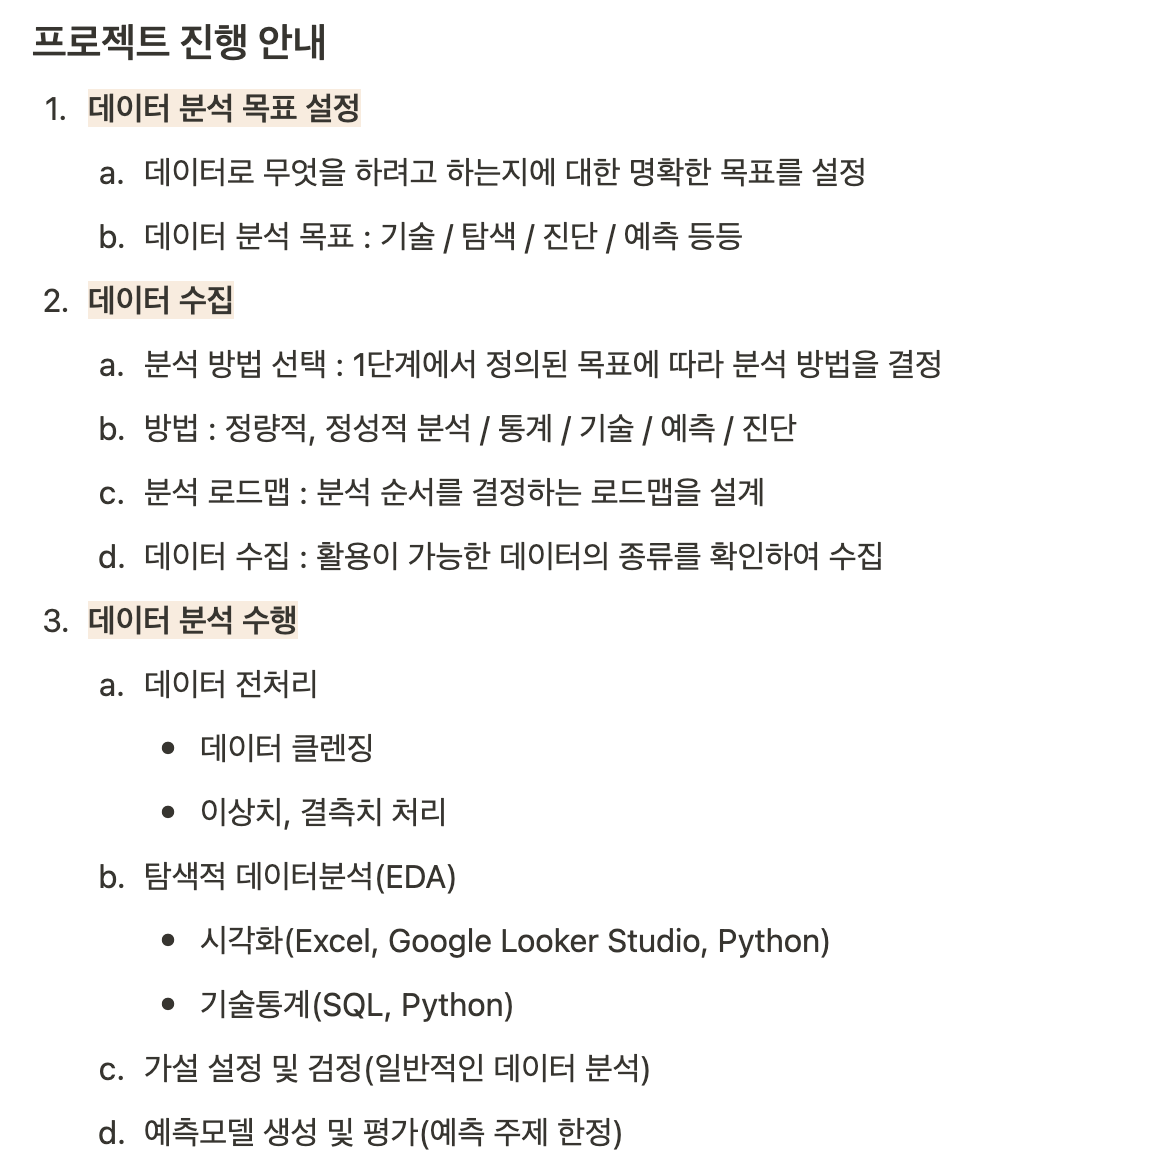

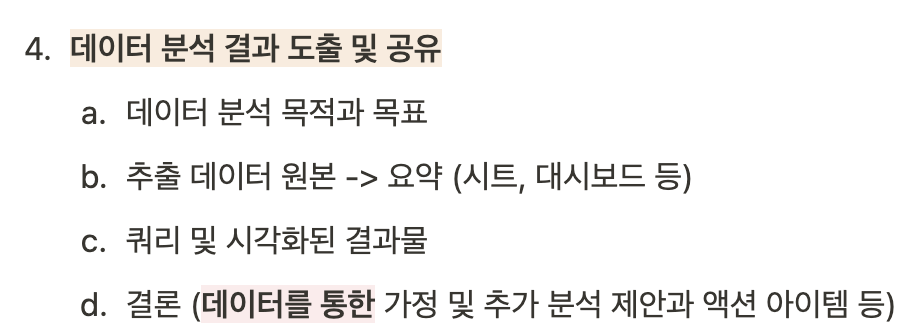

# 데이터 전처리
- 클렌징
- 결측치 처리
- 할 거 없음. 이미 다 정제된 데이터

In [7]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


# 탐색적 데이터 분석(EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [10]:
online['제품카테고리'].value_counts()
# Drinkware : 물잔? 텀블러

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

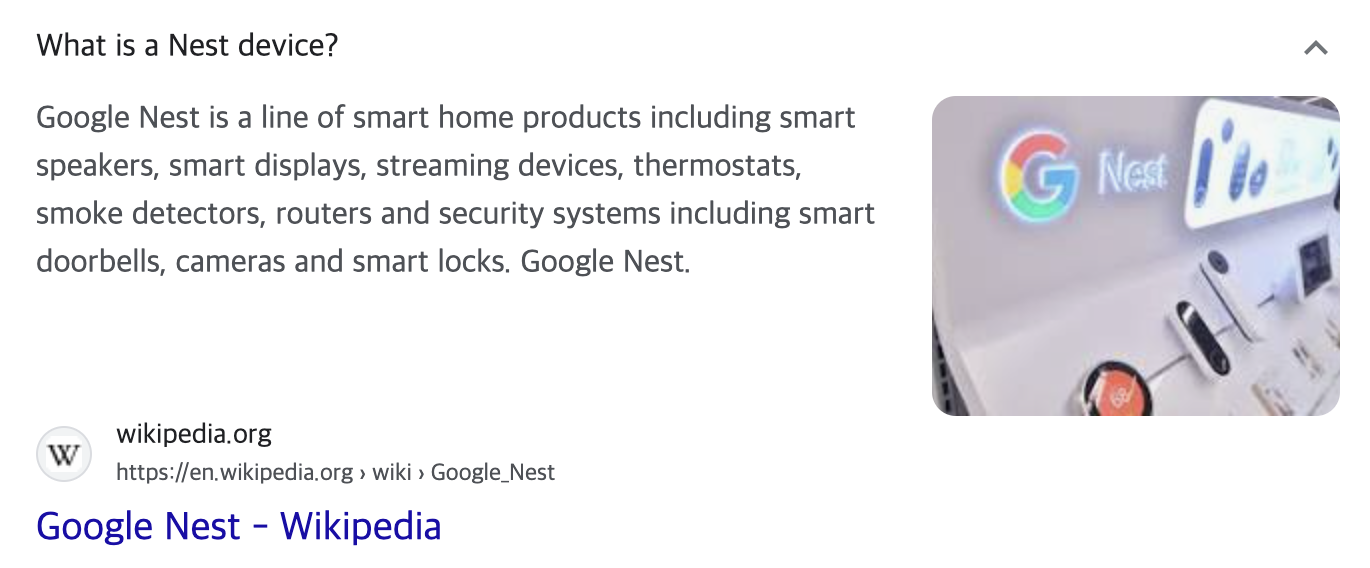

In [11]:
online['쿠폰상태'].value_counts()

쿠폰상태
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

In [12]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [13]:
cus['고객지역'].value_counts()

고객지역
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

In [14]:
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [15]:
mark

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [16]:
tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [17]:
# 제품카테고리	수량	평균금액	배송료	쿠폰상태
# 고객ID	성별	고객지역	가입기간

In [18]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='고객지역', ylabel='count'>

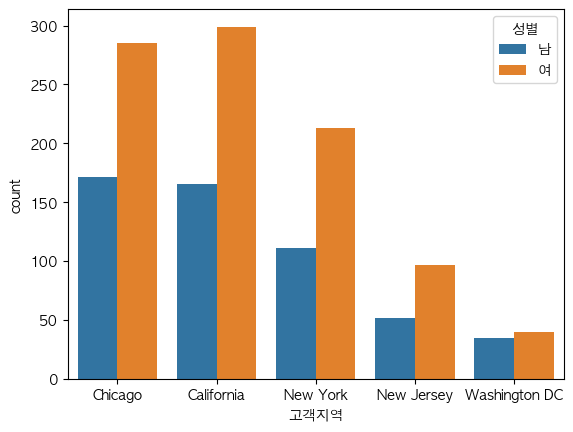

In [19]:
sns.countplot(cus,x='고객지역',hue='성별')
# 모든 지역에서 여성 고객이 더 많음.

In [20]:
# 월	제품카테고리	쿠폰코드	할인율

In [21]:
mark

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [22]:
mark['오프라인비용'].mean()

2843.5616438356165

In [23]:
mark['온라인비용'].mean()

1905.8807397260273

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='고객지역', ylabel='Count'>

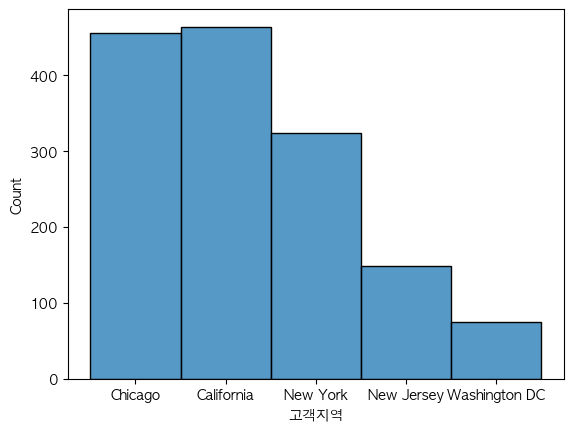

In [24]:
sns.histplot(cus,x='고객지역')

<Axes: xlabel='쿠폰상태', ylabel='count'>

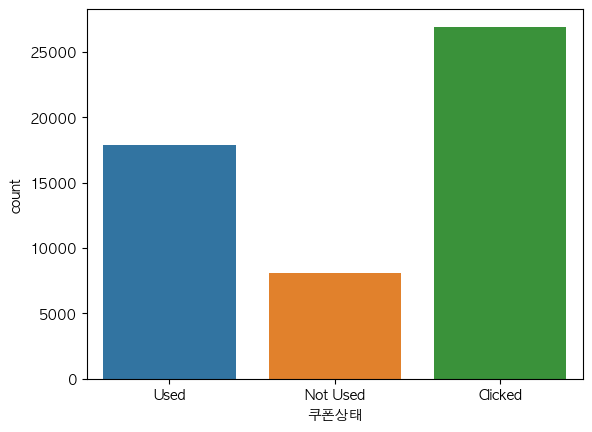

In [25]:
sns.countplot(online,x='쿠폰상태')

In [26]:
dis['쿠폰코드'].value_counts()

쿠폰코드
EXTRA10    8
EXTRA20    8
EXTRA30    8
SALE10     4
ACC20      4
BT20       4
BT30       4
NCA10      4
NCA20      4
NCA30      4
HOU10      4
HOU20      4
HOU30      4
ACC10      4
GC10       4
ACC30      4
WEMP30     4
GC20       4
GC30       4
NJ10       4
NJ20       4
NJ30       4
AND10      4
AND20      4
BT10       4
WEMP10     4
WEMP20     4
SALE20     4
SALE30     4
ELEC10     4
ELEC20     4
ELEC30     4
OFF10      4
OFF20      4
OFF30      4
AIO10      4
AIO20      4
AIO30      4
NOTES10    4
NOTES20    4
NOTES30    4
HGEAR10    4
HGEAR20    4
HGEAR30    4
NE10       4
NE20       4
NE30       4
AND30      4
Name: count, dtype: int64

In [27]:
tax['GST'].value_counts()

GST
0.10    7
0.18    7
0.05    5
0.12    1
Name: count, dtype: int64

In [28]:
online['배송료'].value_counts(normalize=True)

배송료
6.00      0.506405
6.50      0.298900
12.99     0.047842
19.99     0.019689
12.48     0.015078
            ...   
25.27     0.000019
87.70     0.000019
136.09    0.000019
81.70     0.000019
93.52     0.000019
Name: proportion, Length: 267, dtype: float64

In [29]:
online['거래날짜'].value_counts()

거래날짜
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
             ... 
2019-02-05     41
2019-01-28     39
2019-12-24     35
2019-08-20     32
2019-07-01     27
Name: count, Length: 365, dtype: int64

In [30]:
dis['월'].value_counts(normalize=True)

월
Jan    0.083333
Feb    0.083333
Mar    0.083333
Apr    0.083333
May    0.083333
Jun    0.083333
Jul    0.083333
Aug    0.083333
Sep    0.083333
Oct    0.083333
Nov    0.083333
Dec    0.083333
Name: proportion, dtype: float64

In [31]:
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [32]:
tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [33]:
tax.GST.mean()

0.1165

In [34]:
online.head(10)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used
5,USER_1358,Transaction_0003,2019-01-01,Product_0854,Bags,15,5.15,6.5,Used
6,USER_1358,Transaction_0003,2019-01-01,Product_0880,Drinkware,15,3.08,6.5,Not Used
7,USER_1358,Transaction_0003,2019-01-01,Product_0885,Drinkware,15,10.31,6.5,Clicked
8,USER_1358,Transaction_0003,2019-01-01,Product_0898,Drinkware,5,9.27,6.5,Used
9,USER_0190,Transaction_0003,2019-01-01,Product_0914,Office,52,0.98,6.5,Used


In [35]:
online.head(30)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
5,USER_1358,Transaction_0003,2019-01-01,Product_0854,Bags,15,5.15,6.50,Used
6,USER_1358,Transaction_0003,2019-01-01,Product_0880,Drinkware,15,3.08,6.50,Not Used
7,USER_1358,Transaction_0003,2019-01-01,Product_0885,Drinkware,15,10.31,6.50,Clicked
8,USER_1358,Transaction_0003,2019-01-01,Product_0898,Drinkware,5,9.27,6.50,Used
9,USER_0190,Transaction_0003,2019-01-01,Product_0914,Office,52,0.98,6.50,Used


In [36]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


- 지도로 folium 시각화, 지역별 카테고리별 구매 수량
- 쿠폰 클릭한 기록은 있으나 사용 X, 결제는 성공
- unique한 고객 수는 적다. 동일 날짜라도 구매 카테고리별로 다 기재됨.
- 구매 날짜 사이의 간격. Frequency랑 연결.
- 할인율에 따라 얼마나 구매했나
- 계절별로 어떤 제품군 판매됐나. 구매날짜 차원

# 배송료 이상치 데이터 확인

In [37]:
online_cus = pd.merge(online, cus, on='고객ID')
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [38]:
online_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
 9   성별      52924 non-null  object 
 10  고객지역    52924 non-null  object 
 11  가입기간    52924 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


In [39]:
online_cus['배송료'].max()

521.36

In [40]:
online_cus.describe()
# 배송료가 520달러??? 70만원 꼴

,수량,평균금액,배송료,가입기간
count,52924.000000,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630,26.127995
std,20.104711,64.006882,19.475613,13.478285
min,1.000000,0.390000,0.000000,2.000000
25%,1.000000,5.700000,6.000000,15.000000
50%,1.000000,16.990000,6.000000,27.000000
75%,2.000000,102.130000,6.500000,37.000000
max,900.000000,355.740000,521.360000,50.000000


In [41]:
max_shipping= online_cus.loc[online_cus['배송료'].idxmax()]
max_shipping

고객ID                 USER_0830
거래ID         Transaction_14236
거래날짜                2019-08-08
제품ID              Product_0964
제품카테고리    Notebooks & Journals
수량                         185
평균금액                       9.6
배송료                     521.36
쿠폰상태                      Used
성별                           여
고객지역                   Chicago
가입기간                        49
Name: 31511, dtype: object

In [42]:
condition = (online_cus['고객ID'] == 'USER_0830') & (online_cus['거래날짜'] == '2019-08-08')
result = online_cus[condition]
result

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
31476,USER_0830,Transaction_14223,2019-08-08,Product_0445,Apparel,1,4.08,6.00,Not Used,여,Chicago,49
31477,USER_0830,Transaction_14223,2019-08-08,Product_0488,Apparel,1,13.59,6.00,Clicked,여,Chicago,49
31478,USER_0830,Transaction_14223,2019-08-08,Product_0497,Apparel,1,15.19,6.00,Used,여,Chicago,49
31479,USER_0830,Transaction_14223,2019-08-08,Product_0622,Apparel,1,37.20,6.00,Clicked,여,Chicago,49
31480,USER_0830,Transaction_14224,2019-08-08,Product_0535,Apparel,1,4.56,6.00,Clicked,여,Chicago,49
31481,USER_0830,Transaction_14224,2019-08-08,Product_0541,Apparel,1,4.80,6.00,Used,여,Chicago,49
31482,USER_0830,Transaction_14224,2019-08-08,Product_0616,Apparel,1,4.80,6.00,Used,여,Chicago,49
31483,USER_0830,Transaction_14225,2019-08-08,Product_0873,Bags,2,12.31,6.00,Clicked,여,Chicago,49
31484,USER_0830,Transaction_14225,2019-08-08,Product_0972,Lifestyle,1,2.79,6.00,Not Used,여,Chicago,49
31485,USER_0830,Transaction_14225,2019-08-08,Product_0974,Lifestyle,3,3.99,6.00,Used,여,Chicago,49


# 그 달에 지급되는 쿠폰, 그 달에 써야 하는 쿠폰. 월의 의미

In [43]:
dis['월'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [44]:
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [45]:
online_dis = pd.merge(online, dis, on='제품카테고리')
online_dis.head(30)

# 거래 한 건당 할인율이 다른 (10%, 20%, 30%) 쿠폰들이 달마다 발급됨.

# (1,4,7,10) : 10%
# (2,5,8,11) : 20%
# (3,6,9,12) : 30%

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10
1,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20
2,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30
3,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10
4,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20
5,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jun,ELEC30,30
6,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jul,ELEC10,10
7,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Aug,ELEC20,20
8,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Sep,ELEC30,30
9,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Oct,ELEC10,10


# 기간별로 등급 groupby
- (12개월 미만 / 12개월 / 24개월 / 36개월 / 48개월 / 50개월)

In [46]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [47]:
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [48]:
def seg(x):
    if x >= 50 :
        return "vip"
    elif x >= 48 : 
        return "diamond"
    elif x >= 36 :
        return "gold"
    elif x >= 24 :
        return "silver"
    elif x >= 12 : 
        return "bronze"
    else :
        return "new"

In [49]:
online_cus['고객등급'] = online_cus['가입기간'].apply(seg)
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new


In [50]:
online_cus['고객등급'].value_counts(normalize=True)

고객등급
silver     0.290851
gold       0.240779
bronze     0.226646
new        0.195204
diamond    0.032594
vip        0.013926
Name: proportion, dtype: float64

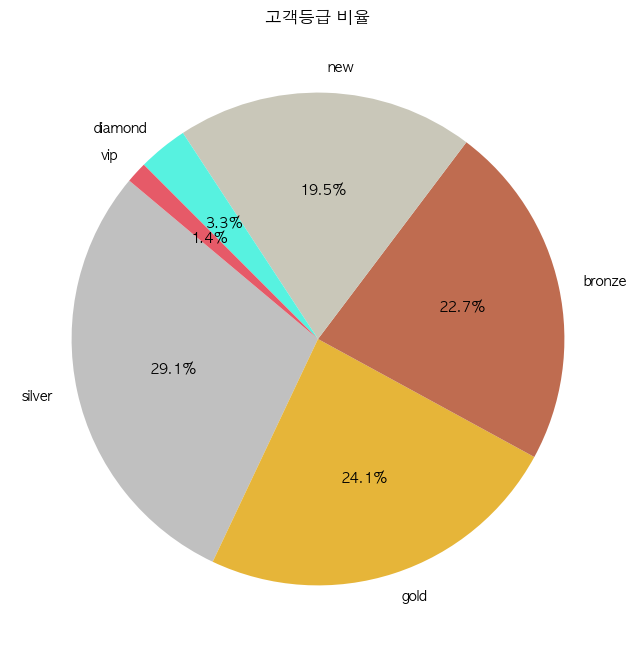

In [51]:
import matplotlib.pyplot as plt

proportions = [0.290851, 0.240779, 0.226646, 0.195204, 0.032594, 0.013926]
labels = ['silver', 'gold', 'bronze', 'new', 'diamond', 'vip']


plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['silver', '#e6b539', '#bf6c50', '#c9c7b9', '#57f2e0', '#e65a68'])
plt.title('고객등급 비율')
plt.show()


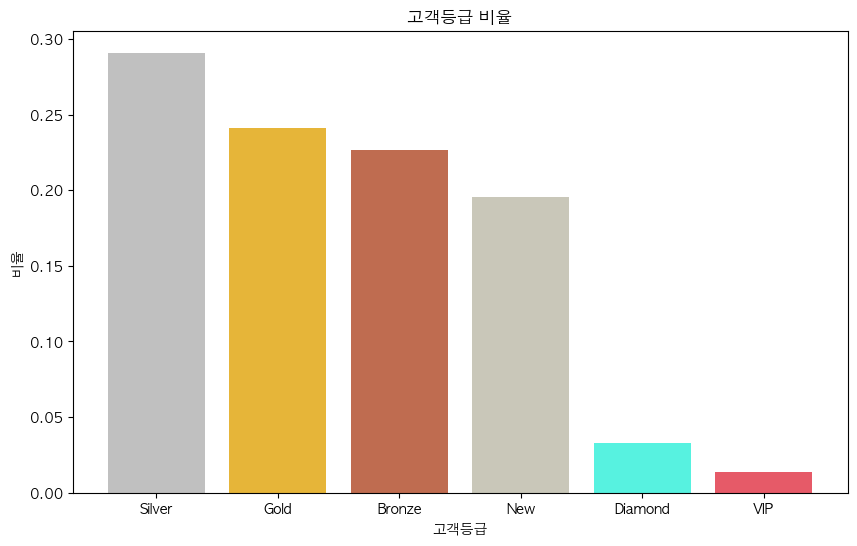

In [52]:
# 주어진 고객등급 비율 데이터
proportions = [0.290851, 0.240779, 0.226646, 0.195204, 0.032594, 0.013926]
labels = ['Silver', 'Gold', 'Bronze', 'New', 'Diamond', 'VIP']

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(labels, proportions, color=['silver', '#e6b539', '#bf6c50', '#c9c7b9', '#57f2e0', '#e65a68'])
plt.title('고객등급 비율')
plt.xlabel('고객등급')
plt.ylabel('비율')
plt.title('고객등급 비율')
plt.show()

# silver 등급 : 가입기간이 12 ~ 24 개월 사이인 유저들이 가장 많음.
# new 등급 : 가입기간이 1년 미만인 유저들

# 지역별로 구매의 잦음 정도 / 구매 물품 목록 / 구매 금액별 분류하기

In [53]:
pd.DataFrame(online_cus.groupby(["고객지역", "제품카테고리"])['수량'].sum())

수량
고객지역          제품카테고리                    
California    Accessories            461
              Android                 14
              Apparel               9669
              Backpacks               36
              Bags                  4495
...                                  ...
Washington DC Nest-Canada             30
              Nest-USA              1240
              Notebooks & Journals   250
              Office                4761
              Waze                    53

[100 rows x 1 columns]

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_7808/537736734.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories = df.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


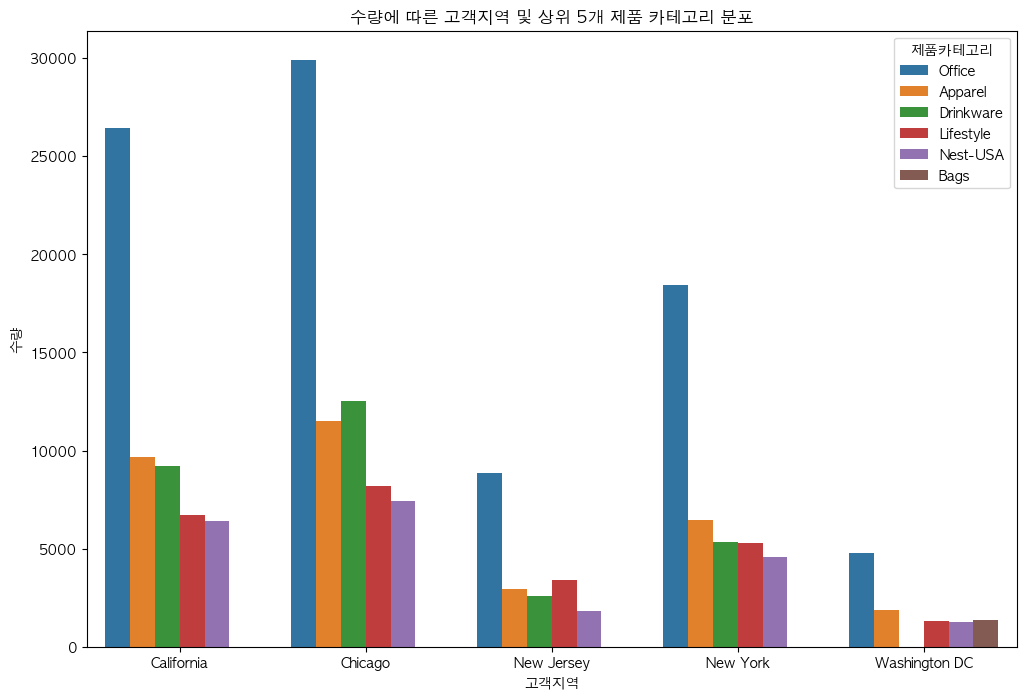

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

df = online_cus.groupby(["고객지역", "제품카테고리"])['수량'].sum().reset_index()

# 수량이 높은 상위 5개 행만 고른다.
# 그룹 키는 결과에서 제외함.
top_categories = df.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='수량', hue='제품카테고리', data=top_categories)

# 그래프 제목과 축 이름 추가
plt.title('수량에 따른 고객지역 및 상위 5개 제품 카테고리 분포')
plt.xlabel('고객지역')
plt.ylabel('수량')

# 범례 추가
plt.legend(title='제품카테고리')

# 그래프 표시
plt.show()

## 지역별로 많이 판매되는 물품 카테고리 순서
- 시카고 : Office > DrinkWare > Apparel > Lifestyle > Nest-USA
- 캘리포니아 : Office > Apparel > DrinkWare > Lifestyle > Nest-USA
- 뉴욕 : Office > Apparel > DrinkWare > Lifestyle > Nest-USA
- 뉴저지 : Office > Lifestyle > Apparel > DrinkWare > Nest-USA
- 워싱턴 DC : Office > Apparel > Bags >= Lifestyle > Nest-USA

In [55]:
# 수량과 (제품 ID당) 금액 을 곱하여 구매 금액이라는 컬럼 생성
online_cus['구매금액'] = online_cus['수량'] * online_cus['평균금액']
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new,402.60


In [56]:
total_pur_region = online_cus.groupby('고객지역')['구매금액'].sum()
total_pur_region

고객지역
California       1442447.31
Chicago          1625885.58
New Jersey        409666.86
New York          937022.63
Washington DC     255772.24
Name: 구매금액, dtype: float64

## 지역별 총 구매금액

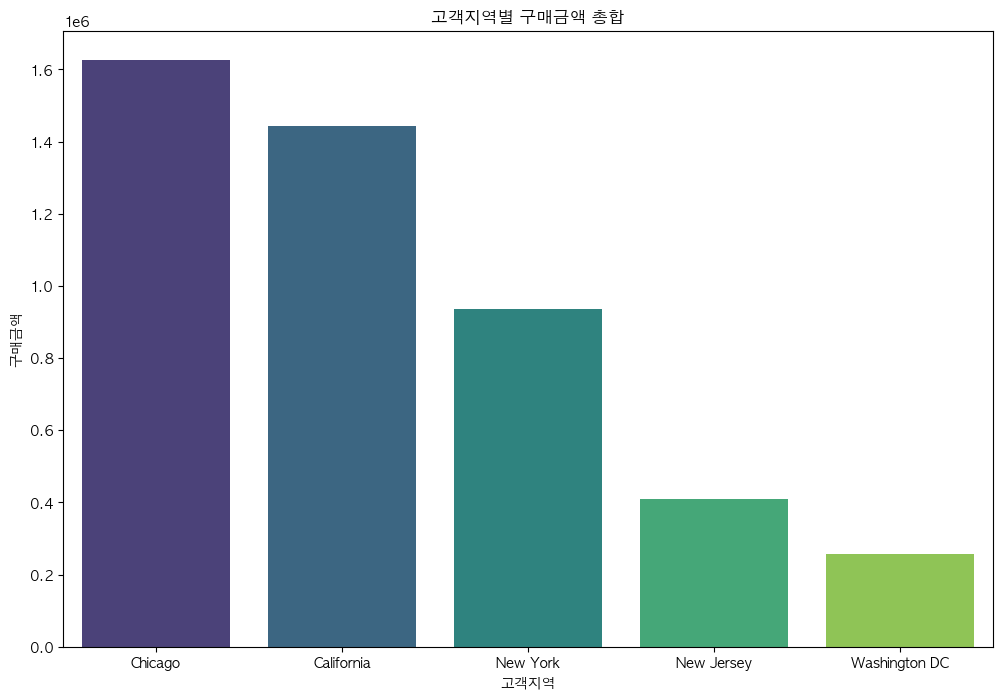

In [57]:
total_pur_region = online_cus.groupby('고객지역')['구매금액'].sum().reset_index()

total_pur_region = total_pur_region.sort_values(by='구매금액', ascending=False)

    
plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='구매금액', data=total_pur_region, palette='viridis')

plt.title('고객지역별 구매금액 총합')
plt.xlabel('고객지역')
plt.ylabel('구매금액')

plt.show()

# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매금액 총합 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC

In [58]:
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new,402.60


/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_7808/2079996563.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_region = top_categories_by_region.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


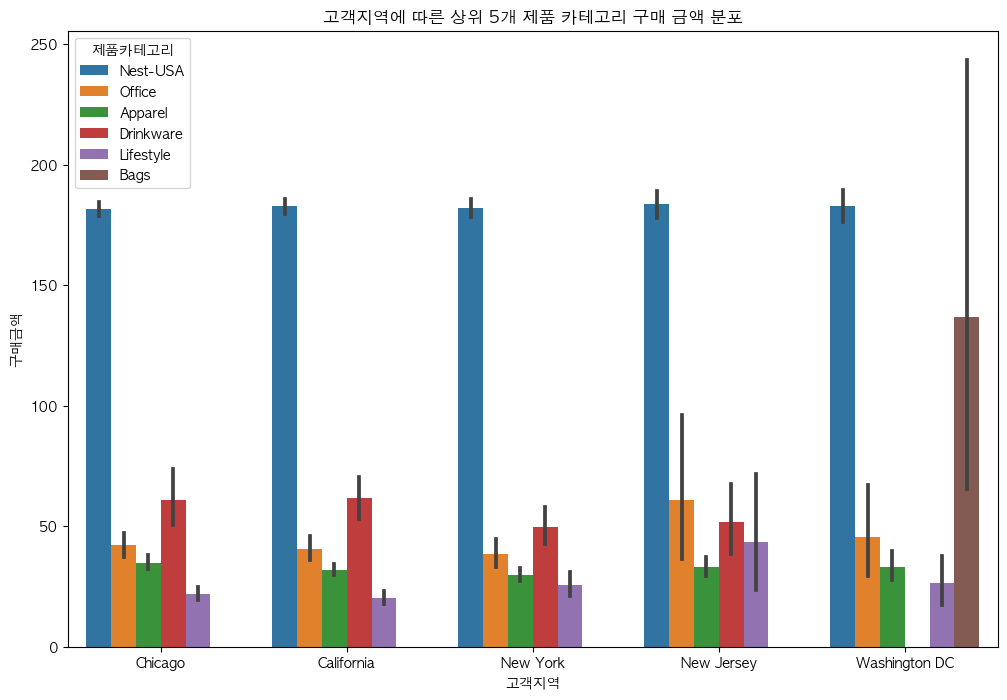

In [59]:
# 각 고객지역에서 수량이 높은 상위 5개 카테고리 선택
top_categories_by_region = online_cus.groupby(['고객지역', '제품카테고리'])['수량'].sum().reset_index()
top_categories_by_region = top_categories_by_region.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))

selected_data = online_cus.merge(top_categories_by_region[['고객지역', '제품카테고리']], on=['고객지역', '제품카테고리'])


plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='구매금액', hue='제품카테고리', data=selected_data)


plt.title('고객지역에 따른 상위 5개 제품 카테고리 구매 금액 분포')
plt.xlabel('고객지역')
plt.ylabel('구매금액')


plt.legend(title='제품카테고리')

plt.show()


# Nest-USA 구매 금액이 높은가 보다. 평균금액이 높은가?

In [60]:
avg_price_by_category = online_cus.groupby('제품카테고리')['평균금액'].mean().reset_index()
sorted_avg_price_by_category = avg_price_by_category.sort_values(by='평균금액', ascending=False)

sorted_avg_price_by_category

,제품카테고리,평균금액
14,Nest,194.221074
15,Nest-Canada,157.243249
16,Nest-USA,124.331850
8,Gift Cards,111.363270
3,Backpacks,80.046404
4,Bags,29.830797
2,Apparel,19.788995
13,More Bags,19.776957
9,Google,16.446190
1,Android,15.903488


In [61]:
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new,402.60


In [62]:
grouped_on_cus = online_cus.groupby(["고객ID", "거래날짜"]).agg('first')
grouped_on_cus

거래ID          제품ID                제품카테고리  \
고객ID      거래날짜                                                                
USER_0000 2019-09-15  Transaction_16900  Product_0048               Apparel   
USER_0001 2019-03-24   Transaction_5262  Product_0945                Office   
          2019-11-01  Transaction_20178  Product_0905                Office   
          2019-11-02  Transaction_20180  Product_0989              Nest-USA   
USER_0002 2019-06-22  Transaction_11033  Product_0892             Drinkware   
...                                 ...           ...                   ...   
USER_1465 2019-04-05   Transaction_5988  Product_0005               Apparel   
          2019-06-20  Transaction_10833  Product_0506               Apparel   
USER_1466 2019-10-23  Transaction_19461  Product_0981              Nest-USA   
USER_1467 2019-07-29  Transaction_13430  Product_0959  Notebooks & Journals   
          2019-10-10  Transaction_18608  Product_0902                Office   

                      수량    평균금액    배송료      쿠폰상태 성별        고객지역  가입기간  \
고객ID      거래날짜                                                           
USER_0000 2019-09-15   1   19.99  75.00      Used  여    New York    31   
USER_0001 2019-03-24   1    2.99  14.41   Clicked  남    New York    20   
          2019-11-01   1    2.39  20.85      Used  남    New York    20   
          2019-11-02   1  149.00   6.00  Not Used  남    New York    20   
USER_0002 2019-06-22  10   24.99   6.00      Used  남  California    39   
...                   ..     ...    ...       ... ..         ...   ...   
USER_1465 2019-04-05   1   15.99   6.50  Not Used  남     Chicago    25   
          2019-06-20   1   14.69   6.00   Clicked  남     Chicago    25   
USER_1466 2019-10-23   2  149.00   6.00  Not Used  여     Chicago    47   
USER_1467 2019-07-29   1   13.50   6.00   Clicked  여  New Jersey    36   
          2019-10-10   1    1.50   6.00   Clicked  여  New Jersey    36   

                        고객등급    구매금액  
고객ID      거래날짜                        
USER_0000 2019-09-15  silver   19.99  
USER_0001 2019-03-24  bronze    2.99  
          2019-11-01  bronze    2.39  
          2019-11-02  bronze  149.00  
USER_0002 2019-06-22    gold  249.90  
...                      ...     ...  
USER_1465 2019-04-05  silver   15.99  
          2019-06-20  silver   14.69  
USER_1466 2019-10-23    gold  298.00  
USER_1467 2019-07-29    gold   13.50  
          2019-10-10    gold    1.50  

[3208 rows x 12 columns]

In [64]:
grouped_on_cus = grouped_on_cus.reset_index()
grouped_on_cus

,고객ID,거래날짜,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액
0,USER_0000,2019-09-15,Transaction_16900,Product_0048,Apparel,1,19.99,75.00,Used,여,New York,31,silver,19.99
1,USER_0001,2019-03-24,Transaction_5262,Product_0945,Office,1,2.99,14.41,Clicked,남,New York,20,bronze,2.99
2,USER_0001,2019-11-01,Transaction_20178,Product_0905,Office,1,2.39,20.85,Used,남,New York,20,bronze,2.39
3,USER_0001,2019-11-02,Transaction_20180,Product_0989,Nest-USA,1,149.00,6.00,Not Used,남,New York,20,bronze,149.00
4,USER_0002,2019-06-22,Transaction_11033,Product_0892,Drinkware,10,24.99,6.00,Used,남,California,39,gold,249.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,USER_1465,2019-04-05,Transaction_5988,Product_0005,Apparel,1,15.99,6.50,Not Used,남,Chicago,25,silver,15.99
3204,USER_1465,2019-06-20,Transaction_10833,Product_0506,Apparel,1,14.69,6.00,Clicked,남,Chicago,25,silver,14.69
3205,USER_1466,2019-10-23,Transaction_19461,Product_0981,Nest-USA,2,149.00,6.00,Not Used,여,Chicago,47,gold,298.00
3206,USER_1467,2019-07-29,Transaction_13430,Product_0959,Notebooks & Journals,1,13.50,6.00,Clicked,여,New Jersey,36,gold,13.50


In [68]:
grouped_on_cus['거래날짜'] = pd.to_datetime(grouped_on_cus['거래날짜'])

In [69]:
grouped_on_cus["날짜차이"] = grouped_on_cus["거래날짜"].diff()
grouped_on_cus

,고객ID,거래날짜,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액,날짜차이
0,USER_0000,2019-09-15,Transaction_16900,Product_0048,Apparel,1,19.99,75.00,Used,여,New York,31,silver,19.99,NaT
1,USER_0001,2019-03-24,Transaction_5262,Product_0945,Office,1,2.99,14.41,Clicked,남,New York,20,bronze,2.99,-175 days
2,USER_0001,2019-11-01,Transaction_20178,Product_0905,Office,1,2.39,20.85,Used,남,New York,20,bronze,2.39,222 days
3,USER_0001,2019-11-02,Transaction_20180,Product_0989,Nest-USA,1,149.00,6.00,Not Used,남,New York,20,bronze,149.00,1 days
4,USER_0002,2019-06-22,Transaction_11033,Product_0892,Drinkware,10,24.99,6.00,Used,남,California,39,gold,249.90,-133 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,USER_1465,2019-04-05,Transaction_5988,Product_0005,Apparel,1,15.99,6.50,Not Used,남,Chicago,25,silver,15.99,-183 days
3204,USER_1465,2019-06-20,Transaction_10833,Product_0506,Apparel,1,14.69,6.00,Clicked,남,Chicago,25,silver,14.69,76 days
3205,USER_1466,2019-10-23,Transaction_19461,Product_0981,Nest-USA,2,149.00,6.00,Not Used,여,Chicago,47,gold,298.00,125 days
3206,USER_1467,2019-07-29,Transaction_13430,Product_0959,Notebooks & Journals,1,13.50,6.00,Clicked,여,New Jersey,36,gold,13.50,-86 days


In [70]:
result_on_cus = grouped_on_cus.groupby("고객ID").apply(lambda x: x.iloc[1:]).reset_index(drop=True)
result_on_cus

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_7808/3961931884.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_on_cus = grouped_on_cus.groupby("고객ID").apply(lambda x: x.iloc[1:]).reset_index(drop=True)


,고객ID,거래날짜,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액,날짜차이
0,USER_0001,2019-11-01,Transaction_20178,Product_0905,Office,1,2.39,20.85,Used,남,New York,20,bronze,2.39,222 days
1,USER_0001,2019-11-02,Transaction_20180,Product_0989,Nest-USA,1,149.00,6.00,Not Used,남,New York,20,bronze,149.00,1 days
2,USER_0002,2019-10-19,Transaction_19256,Product_1046,Apparel,1,8.49,12.99,Clicked,남,California,39,gold,8.49,119 days
3,USER_0006,2019-06-25,Transaction_11138,Product_0904,Office,1,2.99,6.00,Used,여,New York,21,bronze,2.99,30 days
4,USER_0008,2019-11-21,Transaction_21477,Product_0483,Apparel,3,41.59,19.02,Clicked,여,California,27,silver,124.77,139 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,USER_1460,2019-11-28,Transaction_22137,Product_0992,Nest,1,99.00,6.50,Not Used,여,Washington DC,5,new,99.00,146 days
1736,USER_1464,2019-08-11,Transaction_14476,Product_0926,Headgear,4,10.63,80.38,Clicked,남,New York,43,gold,42.52,50 days
1737,USER_1464,2019-10-05,Transaction_18316,Product_0865,Bags,3,55.99,12.91,Used,남,New York,43,gold,167.97,55 days
1738,USER_1465,2019-06-20,Transaction_10833,Product_0506,Apparel,1,14.69,6.00,Clicked,남,Chicago,25,silver,14.69,76 days


In [71]:
result_on_cus['날짜차이'].apply(lambda x: x.days)
result_on_cus['날짜차이2'] = result_on_cus['날짜차이'].apply(lambda x: x.days)

result_on_cus['날짜차이2'] = result_on_cus['날짜차이2'].astype(int)

In [72]:
result_on_cus

,고객ID,거래날짜,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액,날짜차이,날짜차이2
0,USER_0001,2019-11-01,Transaction_20178,Product_0905,Office,1,2.39,20.85,Used,남,New York,20,bronze,2.39,222 days,222
1,USER_0001,2019-11-02,Transaction_20180,Product_0989,Nest-USA,1,149.00,6.00,Not Used,남,New York,20,bronze,149.00,1 days,1
2,USER_0002,2019-10-19,Transaction_19256,Product_1046,Apparel,1,8.49,12.99,Clicked,남,California,39,gold,8.49,119 days,119
3,USER_0006,2019-06-25,Transaction_11138,Product_0904,Office,1,2.99,6.00,Used,여,New York,21,bronze,2.99,30 days,30
4,USER_0008,2019-11-21,Transaction_21477,Product_0483,Apparel,3,41.59,19.02,Clicked,여,California,27,silver,124.77,139 days,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,USER_1460,2019-11-28,Transaction_22137,Product_0992,Nest,1,99.00,6.50,Not Used,여,Washington DC,5,new,99.00,146 days,146
1736,USER_1464,2019-08-11,Transaction_14476,Product_0926,Headgear,4,10.63,80.38,Clicked,남,New York,43,gold,42.52,50 days,50
1737,USER_1464,2019-10-05,Transaction_18316,Product_0865,Bags,3,55.99,12.91,Used,남,New York,43,gold,167.97,55 days,55
1738,USER_1465,2019-06-20,Transaction_10833,Product_0506,Apparel,1,14.69,6.00,Clicked,남,Chicago,25,silver,14.69,76 days,76


In [73]:
result_on_cus['거래날짜'] = pd.to_datetime(result_on_cus['거래날짜'])


result_df = result_on_cus.groupby('고객ID').agg({'날짜차이2': 'mean', '고객지역': 'first'})
result_df

,날짜차이2,고객지역
고객ID,,
USER_0001,111.5,New York
USER_0002,119.0,California
USER_0006,30.0,New York
USER_0008,139.0,California
USER_0009,24.0,New York
...,...,...
USER_1459,150.5,New York
USER_1460,73.5,Washington DC
USER_1464,52.5,New York


In [74]:
result_df = result_df.groupby('고객지역')['날짜차이2'].mean()
result_df

고객지역
California       64.374860
Chicago          64.100521
New Jersey       79.730714
New York         61.776036
Washington DC    60.659101
Name: 날짜차이2, dtype: float64

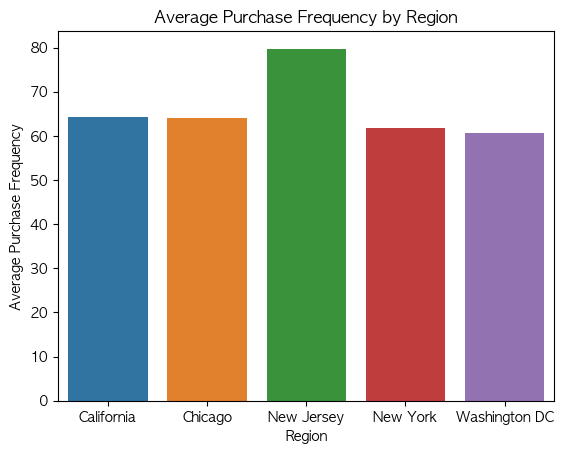

In [75]:
import seaborn as sns

sns.barplot(x=result_df.index, y=result_df.values)
plt.title('Average Purchase Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Average Purchase Frequency')
plt.show()

# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매금액 총합 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매 빈번도 순위 : 워싱턴 DC > 뉴욕 > 시카고 > 캘리포니아 > 뉴저지

# 판매 수량과 금액 총합에서 워싱턴 DC가 가장 꼴찌인데, 가장 빈번하게 접속하는 지역은 워싱턴 DC
# 자주 구매한다는 특성을 살려 워싱턴 DC 지역주민들에게 출석체크 이벤트? 쿠폰 발행이나 포인트 적립 .. 